Numerical solution for The two-body problem:

The two-body problem is a classical mechanics problem that involves predicting the motion of two massive objects, which are abstractly viewed as point particles. The problem assumes that the two objects interact only with one another, and the only force affecting each object arises from the other one, while all other objects are ignored.

The most prominent case of the classical two-body problem is the gravitational case, arising in astronomy for predicting the orbits (or escapes from orbit) of objects such as satellites, planets, and stars. A two-point-particle model of such a system nearly always describes its behavior well enough to provide useful insights and predictions.

The general version of the two-body problem can be reduced to a pair of one-body problems, allowing it to be solved completely, and giving a solution simple enough to be used effectively. However, the three-body problem (and, more generally, the n-body problem for n ≥ 3) cannot be solved in terms of first integrals, except in special cases.

We now use numerical methods to determine the orbit of two masses using Newton’s law and the universal law of gravitation
By solving a system of differential equations. We'll display the animation of the orbit.

Let's consider a simple example of the two-body problem involving a planet and a satellite. We'll assume circular orbits for simplicity.

Define the Initial Conditions:

Mass of the planet: m1
Mass of the satellite: m2
position vectors of the planet: r1
position vectors of the satellite: r2
Gravitational constant: G

The gravitational force between the planet and satellite can be calculated using Newton's law of universal gravitation:

F = -(G * m1 * m2)* (r1-r2)/ |r1-r2|^3

Newton's second law of motion relates force to mass and acceleration:

F = m1 * a1
-F = m2 * a2

The two-body problem can be reduced to a onebody problem by a change of coordinates. Let r be the relative position vector and R be the coordinate of the center of mass; that is:

r = r1 - r2, 
R =(m1r1 + m2r2)/m1 + m2

Solving for r1 and r2 in terms of r and R gives

r1 = R + (m2*r/(m1 + m2))
r2 = R + (m1*r/(m1 + m2))

Now, changing coordinates in Newton’s equations from r1 and r2 to r and R results in:

m1*R'' + (m1*m2*r'')/(m1 + m2) = F,
m2*R'' + (m1*m2*r'')/(m1 + m2) = -F

adding and subtracting these two equations yields the result

R'' = 0,
μ*r'' = F

where μ is called the reduced mass and is given by
μ = (m1*m2)/(m1 + m2)

The center-of-mass coordinate system is an inertial coordinate system (one moving at constant velocity) with the center of mass fixed at the origin (R = 0). The remaining equation for the relative coordinate has the form of a one-body problem, and can be
written as:

r'' = -k*r/r3
k = G(m1 + m2).

Once r is determined, the coordinates of the two masses in the center of mass coordinate system can be found from

r1 = r*m2/(m1 + m2)
r2 = -r*m1/(m1 + m2)

The equivalent one-body problem can be simplified further. The position vector r and the velocity vector r' form a plane, and since the acceleration vector points in the direction of the position vector, the one body motion will be restricted to this plane. We can place our coordinate system so that r lies in the x-y plane with z = 0, and we can write

r = xi + yj

The relevant units are length and time, and they may be nondimensionalized using the constant parameter k (which has units l^3/t^2) and the distance of closest approach of the two masses (the minimum value of r).

The governing equations, in component form, are then given by:

x'' = -x/(x2 + y2)^3/2
y'' = -y/(x2 + y2)^3/2

We can further orient the x-y axes so that the solution r = r(t) is symmetric about the x-axis, and the minimum value of r occurs at x = -1 and y = 0, where symmetry also requires x' = 0. Setting our initial conditions at the point of minimum r, we can write:

x(0) = -1
y(0) = 0
x'(0) = 0
y'(0) = (1 + e)^(1/2)

where we have parameterized y'(0) using e. The parameter e is called the eccentricity of the orbit, and some further analysis can show that closed elliptical orbits correspond to 0 < e < 1 and open hyperbolic orbits correspond to e > 1. The orbit with e = 0 is circular and the orbit with e = 1 is parabolic. Furthermore, the period of a closed orbit is given by:

T = 2*pi/(1 - e)^3/2.

Discretize Time:
Choose a small time step Δt.

Finally we can solve the system of 2nd order ODE by odeint equvalent to ODE45 in Matlab. It will reduce each 2nd order ODE to a system of first order ODEs which is solvable. We can analyze the results by examining the trajectory, energy, and other properties of the satellite's motion. For example, we can calculate the orbital period, verify conservation of energy, or plot the trajectory using the saved position values.

Note that this example assumes circular orbits and neglects the influence of other celestial bodies or factors like air resistance. Real-world scenarios involving the two-body problem can be much more complex, but this example provides a starting point for understanding the numerical solution.

We'll use python to implement the theory expalined above.

<IPython.core.display.Javascript object>


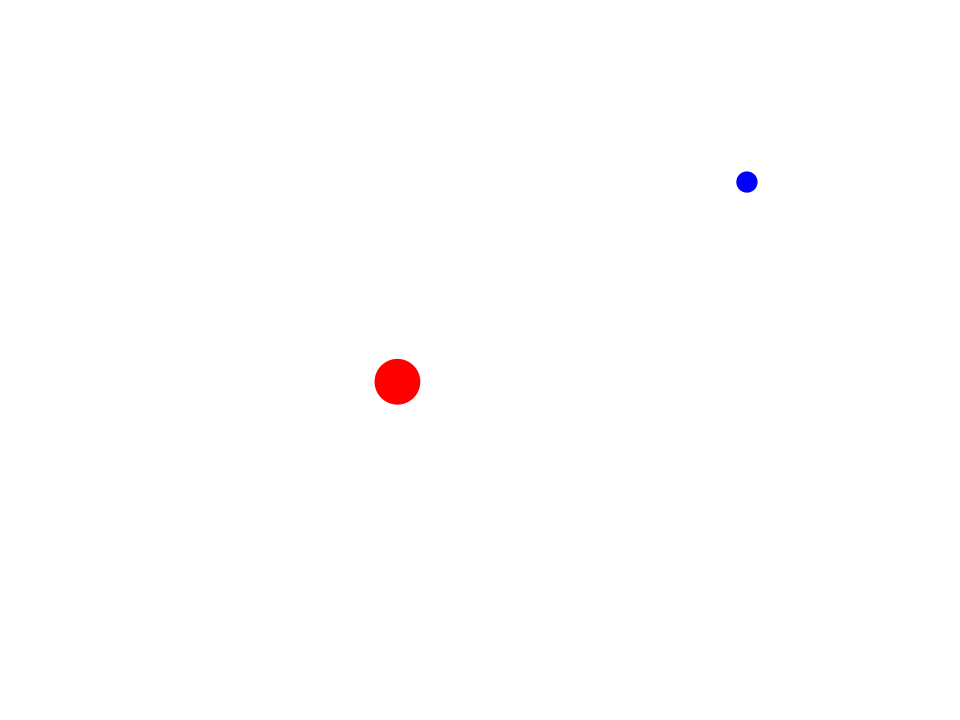

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# Set the parameters
e = 0.2  # Eccentricity of the orbit
m1 = 1  # Mass of the first object
m2 = 10  # Mass of the second object

T = 2 * np.pi / (1 - e) ** 1.5  # Period of the orbit
T = T*5
t = np.linspace(0, T, 10000)  # Time points for simulation

# Define the system of differential equations
def differential_equations(y, t):
    # Unpack the variables
    x1, y1, x2, y2, v1x, v1y, v2x, v2y = y

    # Calculate the distances between the masses
    r = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    # Calculate the gravitational forces
    F1 = m2 / r ** 2
    F2 = m1 / r ** 2

    # Calculate the accelerations
    x1_dotdot = F1 * (x2 - x1) / r
    y1_dotdot = F1 * (y2 - y1) / r
    x2_dotdot = -F2 * (x2 - x1) / r
    y2_dotdot = -F2 * (y2 - y1) / r

    return [v1x, v1y, v2x, v2y, x1_dotdot, y1_dotdot, x2_dotdot, y2_dotdot]

# Initial conditions
x1_0, y1_0 = 0, 0  # Initial position of the first mass
x2_0, y2_0 = 1, 0  # Initial position of the second mass
v1x_0, v1y_0 = 0, np.sqrt((m2 * (1 + e)) / (m1 * (1 - e)))  # Initial velocity of the first mass
v2x_0, v2y_0 = 0, -np.sqrt((m1 * (1 + e)) / (m2 * (1 - e)))  # Initial velocity of the second mass

y0 = [x1_0, y1_0, x2_0, y2_0, v1x_0, v1y_0, v2x_0, v2y_0]  # Initial conditions vector

# Solve the differential equations
sol = odeint(differential_equations, y0, t)

# Extract the positions from the solution
x1, y1, x2, y2, *_ = np.split(sol, 8, axis=1)

# Set up the plot
k = 0.1
R1 = k * m1 ** (1 / 3)  # Radius of the first mass
R2 = k * m2 ** (1 / 3)  # Radius of the second mass
theta = np.linspace(0, 2 * np.pi)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2, 5)
ax.set_ylim(-2.5, 2.5)
ax.axis('off')

# Plot the initial positions
planet = ax.fill(R1 * np.cos(theta) + x1[0], R1 * np.sin(theta) + y1[0], 'b')
sun = ax.fill(R2 * np.cos(theta) + x2[0], R2 * np.sin(theta) + y2[0], 'r')

# Animation update function
def update(frame):
    planet[0].set_xy(np.column_stack((R1 * np.cos(theta) + x1[frame], R1 * np.sin(theta) + y1[frame])))
    sun[0].set_xy(np.column_stack((R2 * np.cos(theta) + x2[frame], R2 * np.sin(theta) + y2[frame])))

# Create the animation
animation = FuncAnimation(fig, update, frames=len(t), interval=1, repeat=True)

plt.show()